# Lab 11: Case Study: Text analysis on Reddit 2017 Christmas Posts

In [1]:
# install.packages('tidytext')
library(tidyverse)
library(stringr)
library(tidytext)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
reddit = read_csv("https://raw.githubusercontent.com/enesdilber/enesdilber.github.io/master/stats306_W2020/reddit.csv")

Parsed with column specification:
cols(
  author = col_character(),
  body = col_character(),
  created_utc = col_datetime(format = "")
)



In [3]:
reddit %>% glimpse

Observations: 100,000
Variables: 3
$ author      <chr> "br_shadow", "Ksalol", "itscool83", "Glu7enFree", "Theoth…
$ body        <chr> "Thank you for this, there is a person writing to me thro…
$ created_utc <dttm> 2017-12-25 15:49:08, 2017-12-25 17:42:50, 2017-12-25 18:…


In [4]:
reddit %>% slice(174)

author,body,created_utc
<chr>,<chr>,<dttm>
Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


In [5]:
reddit = reddit %>% mutate(cid = 1:nrow(reddit)) %>% 
select(cid, everything()) # I add comment id

In [6]:
reddit %>% slice(174)

cid,author,body,created_utc
<int>,<chr>,<chr>,<dttm>
174,Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


## 1 What are the most common words?

Hint use `unnest_tokens`: Split a column into tokens using the tokenizers package, splitting the table into one-token-per-row. In our case we are going to split sentences to words.

## 2 Which one is more common xmas or christmas?

word,n
<chr>,<int>
christmas,4255
xmas,267


## 3 Count the first occurrence of the string "happy \< word \>  or "merry \< word \> " in the comment body, if any, count the matches.

## 4 Find the words that ends with an exclamation mark (!) in each comment (you can match the first one if there are many in a single comment) and get the word just before the exlamation mark. Count the frequencies as we did in previous questions. 

excla,n
<chr>,<int>
christmas!,529
thanks!,495
you!,449
it!,265
too!,201
discord!,158
awesome!,120
holidays!,119
this!,118


## 5 Find the comments which contains "snow" or "flake".

cid,author,body,created_utc,snow,flake
<int>,<chr>,<chr>,<dttm>,<lgl>,<lgl>
388,LederhosenSituation,"Netflix, sleep, eat some more chocolate chip cookies, stare outside at the snow that fell yesterday on Christmas Eve, sleep, play with the cats, watch the dog do zoomies in the snow, and some more sleep.",2017-12-25 17:27:50,TRUE,FALSE
584,KiaraRose16,"Holly, Sandy, Luna, Taffy, any snow related names, Nina, Josie, Starlight, Daisy, Rose, Tulip, Miracle",2017-12-25 17:06:56,TRUE,FALSE
700,TR8R2199,Less than blue. There’s a reason they invested heavily in snowmaking machines,2017-12-25 13:15:28,TRUE,FALSE
946,VarysIsAMermaid69,YEAH ONLY LIEBRALS GET TRIGGERRED I MEAN ITS NOT LIKE HARRASSMENT IS A PROBLEM SNOWFLAKE,2017-12-25 19:28:13,TRUE,TRUE
988,PM_Me_TrashPandas,This is where I'm at too. The worst part is that they don't even realise how hypocritical they are. How can you call someone a snowflake for getting upset at something when you are getting upset at them for being upset? At least We are upset about things that matter. They are just upset because we are upset at how they messed everything up!,2017-12-25 07:03:46,TRUE,TRUE
1033,shewantsthedeeecaf,"We had more snow than expected last night and our destination did too so I was hoping to stay home but alas we are currently driving. I am trying to make the best out of today even if that means modifying my day. All I can think about is sweatpants, blankets and bed :-p I hope your day today goes well too!",2017-12-25 15:25:39,TRUE,FALSE
1148,tolman8r,... that the Hearthswarming episodes were in the summer. [](/snowfallwreathed),2017-12-25 15:57:31,TRUE,FALSE
1559,tBrenna,Looks like Texas? Adorable snow family! :),2017-12-25 18:44:10,TRUE,FALSE
1656,TheKingTortoise,I would assume it's cuz it's pretty with all the snow. And you can see a nice long distance. I went last night but I can't honestly tell you why. Maybe it's instinct or something. Or maybe because snow is mountain stuff.,2017-12-25 16:59:46,TRUE,FALSE


### 5.1 How many of them includes only snow, only flakes and both

sum(snow)
<int>
268


sum(flake)
<int>
33


sum(flake & snow)
<int>
28


### 5.2 Plot hourly number of mentions for snow and flake

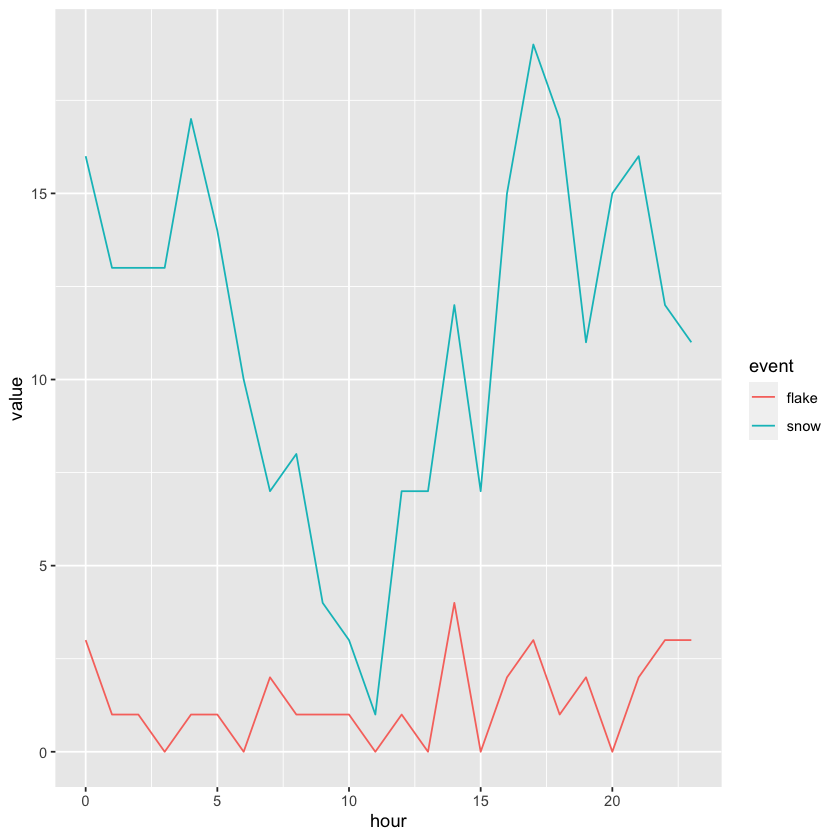

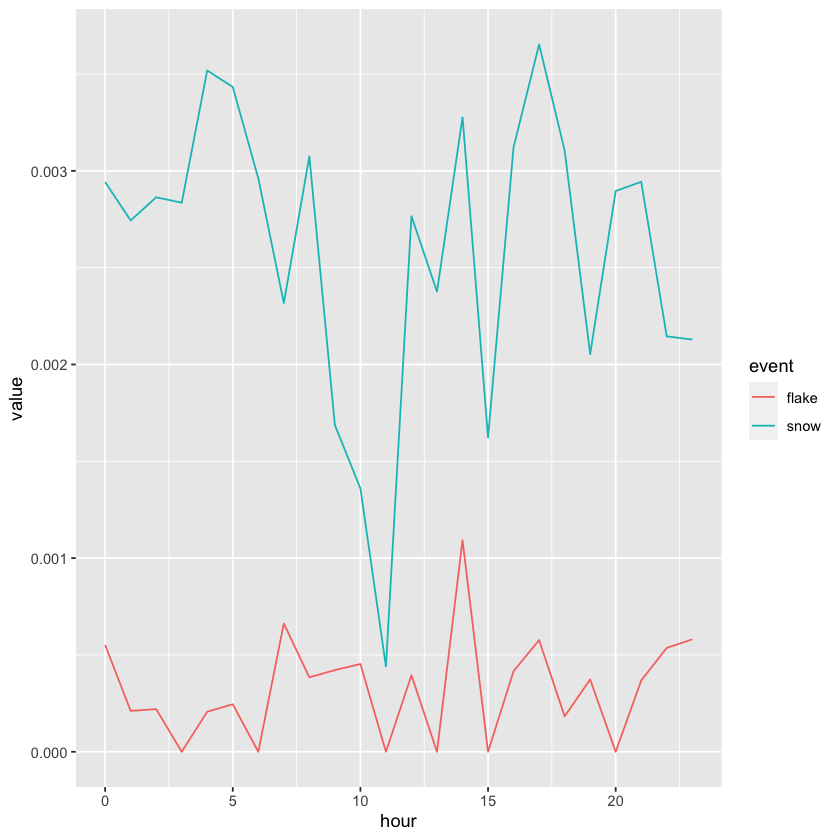

### 5.3 Do the same thing for "friend" and "family or families". The catch is, now you can't match plural form of family with regex of singular form.

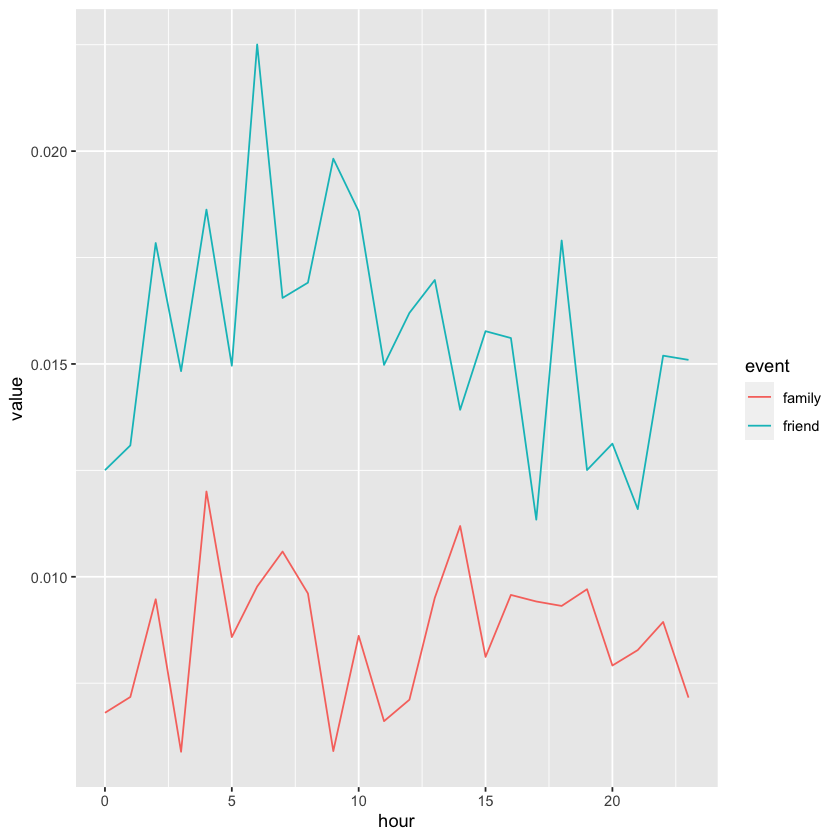

## 6 Find the Common Word Pairs

We can find the common word pairs by n-grams, in this case a word pair is 2-grams.
What is n-gram?\
In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. 

![title](https://i.stack.imgur.com/8ARA1.png)

Again let's print out comment 174.

In [26]:
gram2 = reddit %>% unnest_tokens(ngram, body, token = "ngrams", n = 2)

In [27]:
gram2 %>% filter(cid == 174)

cid,author,created_utc,ngram
<int>,<chr>,<dttm>,<chr>
174,Bareilles,2017-12-25 01:33:50,thank you
174,Bareilles,2017-12-25 01:33:50,you happy
174,Bareilles,2017-12-25 01:33:50,happy holidays
174,Bareilles,2017-12-25 01:33:50,holidays everyone


In [28]:
tops = gram2 %>% group_by(ngram) %>% summarise(n = n()) %>% arrange(desc(n)) 

In [29]:
tops %>% head(20)

ngram,n
<chr>,<int>
in the,6171
of the,6135
if you,5546
NA,5358
to be,3627
i am,3591
you have,3402
on the,3309
https www.reddit.com,3246


In [30]:
swc = str_c(stop_words %>% select(word) %>% deframe, collapse = '|')

In [31]:
swc

[1] "a|a's|able|about|above|according|accordingly|across|actually|after|afterwards|again|against|ain't|all|allow|allows|almost|alone|along|already|also|although|always|am|among|amongst|an|and|another|any|anybody|anyhow|anyone|anything|anyway|anyways|anywhere|apart|appear|appreciate|appropriate|are|aren't|around|as|aside|ask|asking|associated|at|available|away|awfully|b|be|became|because|become|becomes|becoming|been|before|beforehand|behind|being|believe|below|beside|besides|best|better|between|beyond|both|brief|but|by|c|c'mon|c's|came|can|can't|cannot|cant|cause|causes|certain|certainly|changes|clearly|co|com|come|comes|concerning|consequently|consider|considering|contain|containing|contains|corresponding|could|couldn't|course|currently|d|definitely|described|despite|did|didn't|different|do|does|doesn't|doing|don't|done|down|downwards|during|e|each|edu|eg|eight|either|else|elsewhere|enough|entirely|especially|et|etc|even|ever|every|everybody|everyone|everything|everywhere|ex|exactly|example|except|f|far|few|fifth|first|five|followed|following|follows|for|former|formerly|forth|four|from|further|furthermore|g|get|gets|getting|given|gives|go|goes|going|gone|got|gotten|greetings|h|had|hadn't|happens|hardly|has|hasn't|have|haven't|having|he|he's|hello|help|hence|her|here|here's|hereafter|hereby|herein|hereupon|hers|herself|hi|him|himself|his|hither|hopefully|how|howbeit|however|i|i'd|i'll|i'm|i've|ie|if|ignored|immediate|in|inasmuch|inc|indeed|indicate|indicated|indicates|inner|insofar|instead|into|inward|is|isn't|it|it'd|it'll|it's|its|itself|j|just|k|keep|keeps|kept|know|knows|known|l|last|lately|later|latter|latterly|least|less|lest|let|let's|like|liked|likely|little|look|looking|looks|ltd|m|mainly|many|may|maybe|me|mean|meanwhile|merely|might|more|moreover|most|mostly|much|must|my|myself|n|name|namely|nd|near|nearly|necessary|need|needs|neither|never|nevertheless|new|next|nine|no|nobody|non|none|noone|nor|normally|not|nothing|novel|now|nowhere|o|obviously|of|off|often|oh|ok|okay|old|on|once|one|ones|only|onto|or|other|others|otherwise|ought|our|ours|ourselves|out|outside|over|overall|own|p|particular|particularly|per|perhaps|placed|please|plus|possible|presumably|probably|provides|q|que|quite|qv|r|rather|rd|re|really|reasonably|regarding|regardless|regards|relatively|respectively|right|s|said|same|saw|say|saying|says|second|secondly|see|seeing|seem|seemed|seeming|seems|seen|self|selves|sensible|sent|serious|seriously|seven|several|shall|she|should|shouldn't|since|six|so|some|somebody|somehow|someone|something|sometime|sometimes|somewhat|somewhere|soon|sorry|specified|specify|specifying|still|sub|such|sup|sure|t|t's|take|taken|tell|tends|th|than|thank|thanks|thanx|that|that's|thats|the|their|theirs|them|themselves|then|thence|there|there's|thereafter|thereby|therefore|therein|theres|thereupon|these|they|they'd|they'll|they're|they've|think|third|this|thorough|thoroughly|those|though|three|through|throughout|thru|thus|to|together|too|took|toward|towards|tried|tries|truly|try|trying|twice|two|u|un|under|unfortunately|unless|unlikely|until|unto|up|upon|us|use|used|useful|uses|using|usually|uucp|v|value|various|very|via|viz|vs|w|want|wants|was|wasn't|way|we|we'd|we'll|we're|we've|welcome|well|went|were|weren't|what|what's|whatever|when|whence|whenever|where|where's|whereafter|whereas|whereby|wherein|whereupon|wherever|whether|which|while|whither|who|who's|whoever|whole|whom|whose|why|will|willing|wish|with|within|without|won't|wonder|would|would|wouldn't|x|y|yes|yet|you|you'd|you'll|you're|you've|your|yours|yourself|yourselves|z|zero|i|me|my|myself|we|our|ours|ourselves|you|your|yours|yourself|yourselves|he|him|his|himself|she|her|hers|herself|it|its|itself|they|them|their|theirs|themselves|what|which|who|whom|this|that|these|those|am|is|are|was|were|be|been|being|have|has|had|having|do|does|did|doing|would|should|could|ought|i'm|you're|he's|she's|it's|we're|they're|i've|you've|we've|they've|i'd|you'd|he'd|she'd|we'd|they'd|i'll|you

In [32]:
str_detect('minor', swc)

[1] TRUE

In [33]:
swc = str_c('\\b(', swc, ')\\b')
swc

[1] "\\b(a|a's|able|about|above|according|accordingly|across|actually|after|afterwards|again|against|ain't|all|allow|allows|almost|alone|along|already|also|although|always|am|among|amongst|an|and|another|any|anybody|anyhow|anyone|anything|anyway|anyways|anywhere|apart|appear|appreciate|appropriate|are|aren't|around|as|aside|ask|asking|associated|at|available|away|awfully|b|be|became|because|become|becomes|becoming|been|before|beforehand|behind|being|believe|below|beside|besides|best|better|between|beyond|both|brief|but|by|c|c'mon|c's|came|can|can't|cannot|cant|cause|causes|certain|certainly|changes|clearly|co|com|come|comes|concerning|consequently|consider|considering|contain|containing|contains|corresponding|could|couldn't|course|currently|d|definitely|described|despite|did|didn't|different|do|does|doesn't|doing|don't|done|down|downwards|during|e|each|edu|eg|eight|either|else|elsewhere|enough|entirely|especially|et|etc|even|ever|every|everybody|everyone|everything|everywhere|ex|exactly|example|except|f|far|few|fifth|first|five|followed|following|follows|for|former|formerly|forth|four|from|further|furthermore|g|get|gets|getting|given|gives|go|goes|going|gone|got|gotten|greetings|h|had|hadn't|happens|hardly|has|hasn't|have|haven't|having|he|he's|hello|help|hence|her|here|here's|hereafter|hereby|herein|hereupon|hers|herself|hi|him|himself|his|hither|hopefully|how|howbeit|however|i|i'd|i'll|i'm|i've|ie|if|ignored|immediate|in|inasmuch|inc|indeed|indicate|indicated|indicates|inner|insofar|instead|into|inward|is|isn't|it|it'd|it'll|it's|its|itself|j|just|k|keep|keeps|kept|know|knows|known|l|last|lately|later|latter|latterly|least|less|lest|let|let's|like|liked|likely|little|look|looking|looks|ltd|m|mainly|many|may|maybe|me|mean|meanwhile|merely|might|more|moreover|most|mostly|much|must|my|myself|n|name|namely|nd|near|nearly|necessary|need|needs|neither|never|nevertheless|new|next|nine|no|nobody|non|none|noone|nor|normally|not|nothing|novel|now|nowhere|o|obviously|of|off|often|oh|ok|okay|old|on|once|one|ones|only|onto|or|other|others|otherwise|ought|our|ours|ourselves|out|outside|over|overall|own|p|particular|particularly|per|perhaps|placed|please|plus|possible|presumably|probably|provides|q|que|quite|qv|r|rather|rd|re|really|reasonably|regarding|regardless|regards|relatively|respectively|right|s|said|same|saw|say|saying|says|second|secondly|see|seeing|seem|seemed|seeming|seems|seen|self|selves|sensible|sent|serious|seriously|seven|several|shall|she|should|shouldn't|since|six|so|some|somebody|somehow|someone|something|sometime|sometimes|somewhat|somewhere|soon|sorry|specified|specify|specifying|still|sub|such|sup|sure|t|t's|take|taken|tell|tends|th|than|thank|thanks|thanx|that|that's|thats|the|their|theirs|them|themselves|then|thence|there|there's|thereafter|thereby|therefore|therein|theres|thereupon|these|they|they'd|they'll|they're|they've|think|third|this|thorough|thoroughly|those|though|three|through|throughout|thru|thus|to|together|too|took|toward|towards|tried|tries|truly|try|trying|twice|two|u|un|under|unfortunately|unless|unlikely|until|unto|up|upon|us|use|used|useful|uses|using|usually|uucp|v|value|various|very|via|viz|vs|w|want|wants|was|wasn't|way|we|we'd|we'll|we're|we've|welcome|well|went|were|weren't|what|what's|whatever|when|whence|whenever|where|where's|whereafter|whereas|whereby|wherein|whereupon|wherever|whether|which|while|whither|who|who's|whoever|whole|whom|whose|why|will|willing|wish|with|within|without|won't|wonder|would|would|wouldn't|x|y|yes|yet|you|you'd|you'll|you're|you've|your|yours|yourself|yourselves|z|zero|i|me|my|myself|we|our|ours|ourselves|you|your|yours|yourself|yourselves|he|him|his|himself|she|her|hers|herself|it|its|itself|they|them|their|theirs|themselves|what|which|who|whom|this|that|these|those|am|is|are|was|were|be|been|being|have|has|had|having|do|does|did|doing|would|should|could|ought|i'm|you're|he's|she's|it's|we're|they're|i've|you've|we've|they've|i'd|you'd|he'd|she'd|we'd|they'd|i'll

In [34]:
str_detect('minor', swc)

[1] FALSE

In [35]:
str_detect('in', swc)

[1] TRUE

In [36]:
tops %>% filter(!str_detect(ngram, swc)) %>% head(20)

ngram,n
<chr>,<int>
message compose,2173
merry christmas,2084
amp 32,1370
performed automatically,1370
hahahahaha hahahahaha,1270
subreddit message,1198
imagesofnetwork wiki,636
wiki faqandinstructions,636
amp subject,568


Still needs some case-spesific stop-words removal.